# Bernstein-Vazirani Algorithm

In [2]:
# Import Qiskit libraries
from qiskit import *

# Importing numpy
import numpy as np


In [3]:
# Assign secret number
s = "110";

# Create circuit
n = len(s);
circuit_bv = QuantumCircuit(n+1, n)

# Apply hadamard gate to all qubits
circuit_bv.h(range(n+1))

# Apply z gate to the last qubit
circuit_bv.z(n)

# Apply a barrier
circuit_bv.barrier()

# Reverse the order of S
s = s[ : : -1]
print(s)
# Construct the Oracle by applyin CNOT gate
for i in range(n):
    if s[i] == "1":
        circuit_bv.cx(i,n);
circuit_bv.barrier()
circuit_bv.h(range(n))
circuit_bv.measure(range(n),range(n))
circuit_bv.draw()



011


┌───┐      ░            ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░────────────░─┤ H ├┤M├──────
     ├───┤      ░            ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

# Run Using Local Simulator

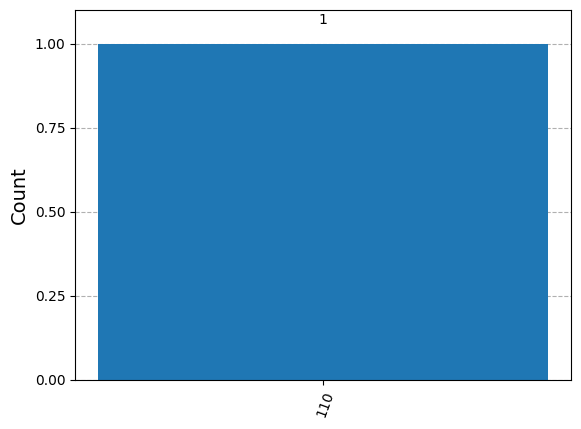

In [4]:
# Import AerSimulator from qiskit_aer
from qiskit_aer import AerSimulator

# Run the circuit on the simulator and obtain the result
result = AerSimulator().run(circuit_bv, shots=1, memory=True).result()

# Get the counts from the results
answer = result.get_counts()

# Import plot_histogram from qiskit.visualization
from qiskit.visualization import plot_histogram
plot_histogram(answer)

# Run on Real Quantum Device

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler


# To access saved credentials for the IBM quantum channel
service = QiskitRuntimeService(channel="ibm_quantum")

# Call the Quantum computer you want to use
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print("Least busy backend:", backend)

# Optimize and transform quantum circuits
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
circuit_bv_transpiled = pm.run(circuit_bv)

# Execute quantum circuits
sampler = Sampler(mode=backend)
job = sampler.run([circuit_bv_transpiled], shots=1024)
print(f" >>> Job ID: {job.job_id()}")
print(f" >>> Job Status: {job.status()}")
result = job.result()
print(f">>> Counts: {result[0].data.meas.get_counts()}")

Least busy backend: <IBMBackend('ibm_sherbrooke')>
 >>> Job ID: cwwxq3w60bqg008pt0dg
 >>> Job Status: QUEUED
